# Story 7
Waheeb Algabri    
DATA 608
CUNY Data Science Master's

## Data Sources

- [IEA Critical Minerals Demand Dataset](https://www.iea.org/data-and-statistics/data-product/critical-minerals-demand-dataset)
- [Global Geochemical Database for Critical Minerals](https://www.sciencebase.gov/catalog/item/5e616381e4b01d509255c7b6)
    - [Download link for CSV data](https://www.sciencebase.gov/catalog/file/get/5e616381e4b01d509255c7b6?f=__disk__9f%2Fe3%2F8b%2F9fe38b3bec1b9bc404b14578a226c080fcecf834&allowOpen=true) (USGS)
- [Diplomatic Relations of the UNited States](https://en.wikipedia.org/wiki/Foreign_relations_of_the_United_States)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO

I exported the data contained in the  [IEA Mineral Projected Demand dataset here](https://www.iea.org/data-and-statistics/data-product/critical-minerals-demand-dataset).

In [27]:
demand = pd.read_excel("/content/CM_Data_Explorer May 2024.xlsx", header=[0,1],
                   index_col=[0], skiprows=[1])
demand.head()

""


In [28]:
demand.columns = [str(c[-1]) for c in demand.columns]
demand.head()

""


In [29]:
# Breaking out into projecte
year_cols = ["2025", "2030", "2035", "2040", "2045", "2050"]
demand_stated = demand[['2022'] + year_cols]


# Get pledged and Net-Zero dataframes: clean up column names
demand_pledges = demand[[f"{c}.1" for c in year_cols]]
demand_pledges.columns = [c.replace(".1", "") for c in demand_pledges.columns]

demand_net_zero = demand[[f"{c}.2" for c in year_cols]]
demand_net_zero.columns = [c.replace(".2", "") for c in demand_net_zero.columns]
demand_stated.head()

KeyError: "None of [Index(['2022', '2025', '2030', '2035', '2040', '2045', '2050'], dtype='object')] are in the [columns]"

In [20]:
url = "https://www.sciencebase.gov/catalog/file/get/5e616381e4b01d509255c7b6?f=__disk__9f%2Fe3%2F8b%2F9fe38b3bec1b9bc404b14578a226c080fcecf834&allowOpen=true"

r = requests.get(url)
data = r.text

In [21]:
df = pd.read_csv(StringIO(data))

df.head()

,LAB_ID,PREVIOUS_LAB_ID1,PREVIOUS_LAB_ID2,PREVIOUS_LAB_ID3,FIELD_ID,JOB_ID,PREVIOUS_JOB_ID1,PREVIOUS_JOB_ID2,PREVIOUS_JOB_ID3,SUBMITTER,...,Th_ppm_MS_ST,Tl_ppm_MS_ST,Tm_ppm_MS_ST,U_ppm_MS_ST,V_ppm_AES_ST,W_ppm_MS_ST,Y_ppm_MS_ST,Yb_ppm_MS_ST,Zn_ppm_AES_ST,Zr_ppm_AES_ST
0,C355417,NaN,NaN,NaN,RM0001,MRP11968,NaN,NaN,NaN,Rare Metals Task,...,0.2,-0.5,-0.05,0.30,51.0,-1.0,-0.5,-0.1,1290.0,3.8
1,C360759,NaN,NaN,NaN,RM0027,MRP12307,NaN,NaN,NaN,Rare Metals Task,...,9.7,0.5,-0.05,1.75,24.0,28.0,2.3,0.3,-5.0,133.0
2,C360762,NaN,NaN,NaN,RM0030,MRP12307,NaN,NaN,NaN,Rare Metals Task,...,2.6,-0.5,0.08,0.63,-5.0,22.0,5.9,0.6,161.0,16.2
3,C360763,NaN,NaN,NaN,RM0031,MRP12307,NaN,NaN,NaN,Rare Metals Task,...,0.2,-0.5,-0.05,34.80,493.0,11.0,1.9,0.2,29.0,19.1
4,C360769,NaN,NaN,NaN,RM0037,MRP12307,NaN,NaN,NaN,Rare Metals Task,...,2.6,-0.5,0.22,31.20,68.0,8.0,13.0,1.4,4480.0,150.0


In [ ]:
# Write USGS data to CSV if desired
# df.to_csv("data/mineral-samples.csv", index=False)

In [22]:
# Mapping countries to whether they are allies, neutral, or hostile
# https://en.wikipedia.org/wiki/Foreign_relations_of_the_United_States

alliance_mapping= {
    'Chile': "Neutral",
    'South Africa': "Ally",
    'Finland': "Ally",
    'Mexico': "Neutral",
    'Indonesia': "Ally",
    'Norway': "Ally",
    'Canada': "Ally",
    'Russia': "Strained Relations",
    'Japan': "Ally",
    'Philippines': "Neutral",
    'Peru': "Neutral",
    'Cuba': "Strained Relations",
    'Australia': "Ally",
    'Burma': "Neutral",
    'Portugal': "Ally",
    'Sweden': "Ally",
    'China': "Strained Relations",
    'Mauritania': "Neutral",
    'Brazil': "Neutral",
    'Argentina': "Neutral",
    'Germany': "Ally",
    'Namibia': "Neutral",
    'Zambia': "Neutral",
    'India': "Neutral",
    'Poland': "Ally",
    'Democratic Republic of Congo': "Neutral",
    'Vietnam': "Neutral",
    'Papua New Guinea': "Neutral",
    'Honduras': "Neutral"
}
# Map relations to color
color_mapping = {
    "Ally": "b",
    "Strained Relations": "r",
    "Neutral": "g"
}

In [23]:
# Get number of mineral samples produced by country
dat = df.loc[df.COUNTRY != "United States"]

dat = df.groupby("COUNTRY").count()\
    .reset_index()\
    .sort_values("LAB_ID", ascending=False)

dat['relations'] = dat['COUNTRY'].map(alliance_mapping)
dat['relations_color'] = dat['relations'].map(color_mapping)


Text(0.5, 0.98, 'Number of Mineral Samples Produced Internationally')

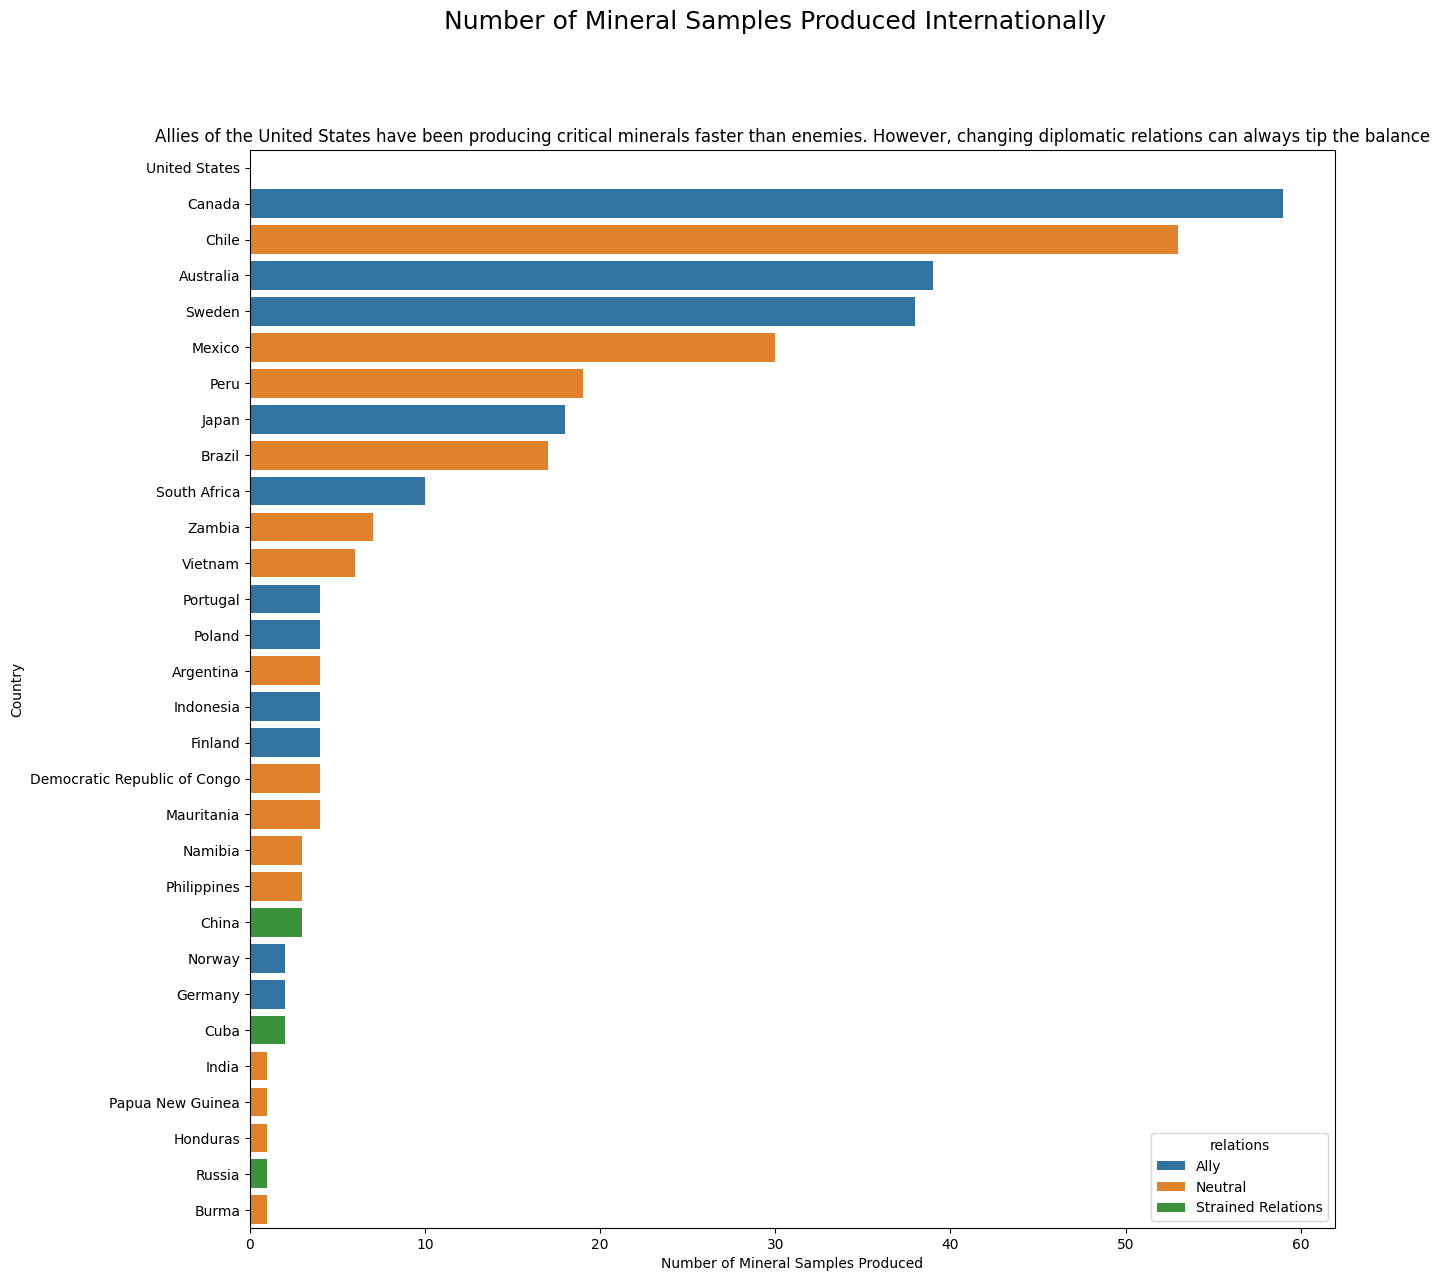

In [24]:
# Plot number of mineral samples per country
f, ax = plt.subplots(figsize=(14, 14))
sns.barplot(x="LAB_ID", y="COUNTRY", data=dat, hue='relations', dodge=False)
plt.xlabel("Number of Mineral Samples Produced")
plt.ylabel("Country")
plt.title("Allies of the United States have been producing critical minerals faster than enemies. However, changing diplomatic relations can always tip the balance")
plt.suptitle("Number of Mineral Samples Produced Internationally", fontsize=18)

In [25]:
#  Getting total mineral demand by year
total_demand = demand_stated.drop("2022", axis=1).sum()
demand_2022 = demand_stated["2022"].sum()
total_pledge_demand = demand_pledges.sum()
total_demand_zero_emissions = demand_net_zero.sum()
total_demand

NameError: name 'demand_stated' is not defined

One contributor to the rise in demand for critical minerals is the increase of the presence of clean technology. We can use the IEA data to show the projected demand for a few different scenarios

1. If current pledges by countries to meet emissions quotas remain
2. If countries meet their emission pledges
3. If countries were to go neyt-zero emissions by 2050

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
plt.plot(total_demand_zero_emissions, label="Net-Zero Emissions")
plt.plot(total_pledge_demand, label="Pledges Made")
plt.plot(total_demand, label="Current Policies")

# Add labels and legend
plt.ylabel("Total Critical Mineral Demand (kilotons)")
plt.xlabel("Year")
plt.suptitle("Clean Energy Critical Mineral Demand Projections through 2050: IEA", fontsize=18)
plt.title("With increasing demand for critical minerals to fuel clean technology, supply will have to keep up\nRequired demand to reach a net-zero emissions goal by 2050 is outpacing current projections for critical mineral demand.")

plt.legend(title="Projected Clean Tech Mineral Demand for...")



In [ ]:
key_mineral_demand = pd.read_csv("./data/key-mineral-demand.csv", header=[1], index_col=[0])
key_mineral_demand['mineral'] = key_mineral_demand['Unnamed: 1']
key_mineral_demand['clean_tech'] = key_mineral_demand.index.values
key_mineral_demand.head()

In [ ]:
# Cleaning up columns
year_cols = ["2025", "2030", "2035", "2040", "2045", "2050"]
key_demand_stated = key_mineral_demand[['2022', "mineral"] + year_cols]

# Get pledged and Net-Zero dataframes: clean up column names
key_demand_pledges = key_mineral_demand[['mineral'] + [f"{c}.1" for c in year_cols]]
key_demand_pledges.columns = [c.replace(".1", "") for c in key_demand_pledges.columns]

key_demand_net_zero = key_mineral_demand[['mineral'] + [f"{c}.2" for c in year_cols]]
key_demand_net_zero.columns = [c.replace(".2", "") for c in key_demand_net_zero.columns]

In [ ]:
minerals = key_mineral_demand.mineral.unique()
cols = ["Solar PV", "Wind", "Other low emissions power generation",
        "Electric vehicles", "Grid battery storage",
        "Electricity networks", "Hydrogen technologies"]

In [ ]:
# Plot key mineral demand by clean technology
# TODO: enforce consistent legend across panels
dfs = {"Current Emissions": key_demand_stated.drop("2022", axis=1),
       "Pledged Emissions": key_demand_pledges,
       "Net-zero Emissions": key_demand_net_zero}

f, axes = plt.subplots(3, 1, figsize=(8, 13), sharex=True, sharey=True)
lines = []
# Create an empty list to store legend handles and labels
legend_handles = []
for d, (label, df) in enumerate(dfs.items()):
    # for i, mineral in enumerate(minerals):
    ax = axes[d]
    # mineral = minerals[i]
    dat = df.loc[(df.mineral == "Copper")]# & (df.clean_tech != "Electricity networks")]
    dat = dat.drop("mineral", axis=1).T

    # Plot the data and store the line handle for the legend
    dat.plot(ax=ax)

    # remove legend
    ax.set_title(label)
    ax.set_ylabel("Projected Mineral Demand (kilotons)")
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()


# Add a legend to the last subplot
f.legend(handles, labels, loc='center right')
plt.suptitle("Critical Mineral Clean Tech Demand: Copper", fontsize=18)
plt.figtext(0.5, 0.92, "Demand for clean technology will only increase with more ambitious emissions goals.\nNet-zero emissions goals will require higher extraction of copper (and other critical minerals)")

# Show the plot
plt.show()

Now we can look at projected clean technology demand for Lithium, an important mineral for producing batteries, especially ones for electric vehicles

In [ ]:
f, axes = plt.subplots(3, 1, figsize=(8, 13), sharex=True, sharey=True)
lines = []
# Create an empty list to store legend handles and labels
legend_handles = []
for d, (label, df) in enumerate(dfs.items()):
    ax = axes[d]
    dat = df.loc[(df.mineral == "Lithium")]
    dat = dat.drop("mineral", axis=1).T

    # Plot the data and store the line handle for the legend
    dat.plot(ax=ax)

    # remove legend
    ax.set_title(label)
    ax.set_ylabel("Projected Mineral Demand (kilotons)")
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()

# Add a legend to the last subplot
f.legend(handles, labels, loc='center right')
plt.suptitle("Critical Mineral Clean Tech Demand: Lithium", fontsize=18)
plt.figtext(0.5, 0.92, "Similar to copper, the emergency of new clean technology will increase the need for enhanced lithium production.")

# Show the plot
plt.show()

## Conclusion
As we can see, the overall demand for critical minerals will increase in the future. Specifically, demand stemming from clean technologies (solar panels, electric vehicles, etc) for these critical minerals will also be increasing. Furthermore, more ambitious emissions goals for countries (including the goal of net-zero emissions by 2050) will cause this clean tech demand for minerals to be **even higher**. As a result, securing  the supply of these critical minerals will be crucial in order to meet those clean technology demands.